<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_09_MatricesAutovaloresAutovectores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch as pt
import sympy as sp
import matplotlib.pyplot as plt

# Autovalores, autovectores, diagonalización

Una matriz es diagonalizable cuando es semejante a una matriz diagonal. Esto significa que mediante un cambio de base, podemos reducir la matriz original a una forma diagonal. Para que una matriz sea diagonalizable, debe cumplir las siguientes condiciones:

**Autovectores linealmente independientes**: Una matriz $(A \in \mathbb{R}^{n \times n})$ es diagonalizable si y solo si tiene (n) autovectores linealmente independientes. Esto significa que los autovectores asociados a los autovalores deben ser linealmente independientes.

**Semejanza**: Existe una matriz invertible (P) tal que ($P^{-1}AP = D$), donde (D) es una matriz diagonal formada por los autovalores de (A).

La diagonalización es un proceso que transforma una matriz cuadrada ( A ) en una matriz diagonal ( D ) mediante una matriz invertible ( P ), tal que:

$P^{-1}AP = D$

La matriz diagonal ( D ) contiene los autovalores de ( A ) en la diagonal principal, y las columnas de ( P ) son los autovectores correspondientes a esos autovalores.

## Numpy

In [2]:
# Definir una matriz 3x3
A = np.array([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)


Autovalores: [6.16424794 1.60861762 3.22713444]
Autovectores:
 [[-0.6611152   0.56181831 -0.49727948]
 [-0.7154086  -0.6717612   0.19216509]
 [-0.2260912   0.48280128  0.84604119]]


### Matriz Diagonal

In [3]:
D = np.linalg.inv(U)@A@U
np.set_printoptions(suppress=True, precision=6)
D

array([[ 6.164248,  0.      , -0.      ],
       [-0.      ,  1.608618, -0.      ],
       [ 0.      , -0.      ,  3.227134]])

In [4]:
np.set_printoptions(suppress=True, precision=6)


## Actividad:

Construir un programa que permita elevar una matriz a una potencia.


La exponencial de una matriz ( $e^A$) se define como la serie de Taylor de la función exponencial evaluada en la matriz ( A ):


\begin{equation}
e^A = I + A + \frac{1}{2!}A^2 + \frac{1}{3!}A^3 + \cdots = \sum_{n=0}^{\infty} \frac{1}{n!}A^n
\end{equation}


Donde ( $e^D$ ) es simplemente la matriz exponencial de la matriz diagonal ( D ), que es fácil de calcular porque solo implica elevar los autovalores de (A) a la potencia de (e):



\begin{equation}
e^A = Pe^DP^{-1}
\end{equation}


Exponencial de una matriz diagonal

\begin{equation}
e^D = \begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & e^{\lambda_n}
\end{bmatrix}
\end{equation}




In [5]:
# Definimos la funcion para elevar una matriz A a una potencia n
def pot_matriz(A, n):
  # Calculemos los autovalores y autovectores de A
  autovalores, autovectores = np.linalg.eig(A)

  # Definimos la matriz de cambio de base con los autovectores de A como sus columnas
  U = autovectores.copy()

  # Calculamos la matriz diagonal D
  D = U.I @ A @ U

  # Calculamos A^n
  An = U @ D**n @ U.I

  np.set_printoptions(suppress=True, precision=6)
  return An

# Probemos nuestra funcion
A = np.matrix([[2, -1, 1],
               [0, 3, -1],
               [2, 1, 3]])

# Calculamos A^6 con la funcion y multiplicando A 6 veces
A6c = pot_matriz(A, 6)
A6e = A @ A @ A @ A @ A @ A

# Vemos la comparacion de los resultados
print('La matriz A elevada a la 6 usando la funcion da como resultado')
print(A6c)
print('El valor esperado de la matriz A elevada a la 6 da como resultado')
print(A6e)

La matriz A elevada a la 6 usando la funcion da como resultado
[[ 1888.+0.j  -192.+0.j  2016.-0.j]
 [-1824.+0.j   256.+0.j -2016.-0.j]
 [ 2208.-0.j   192.-0.j  2080.+0.j]]
El valor esperado de la matriz A elevada a la 6 da como resultado
[[ 1888  -192  2016]
 [-1824   256 -2016]
 [ 2208   192  2080]]


# Autovalores y autovectores complejos

In [6]:
theta=-np.pi/4
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)

D = np.linalg.inv(U)@A@U
np.set_printoptions(suppress=True, precision=6)
D

Autovalores: [0.707107+0.707107j 0.707107-0.707107j]
Autovectores:
 [[0.707107+0.j       0.707107-0.j      ]
 [0.      +0.707107j 0.      -0.707107j]]


array([[0.707107+0.707107j, 0.      +0.j      ],
       [0.      +0.j      , 0.707107-0.707107j]])

In [7]:
np.exp(D)

array([[1.541863+1.317538j, 1.      +0.j      ],
       [1.      +0.j      , 1.541863-1.317538j]])

Actividad 2.

Considere la ecuación cuadrática $x^2-4xy+3y^2=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:

$A\vec{v} \cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica,

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}

1. Realice un grafico que represente la hyperbola







- Diagonalice A, para ello construya la matrix Q de autovectores ortoganales
tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.

- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base

\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}


\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


Sea $u=Q^T\vec{v}$

Luego :


\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola

Solucionando la ecuación cuadrática para y, tenemos que:

$$ y = \frac{1}{3}(2x\pm\sqrt{x^2+18}) $$

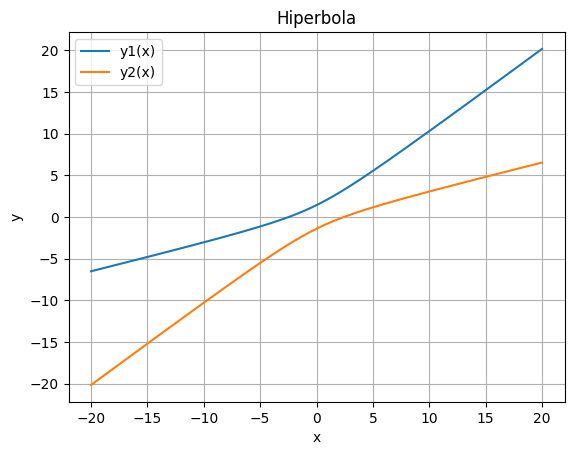

In [8]:
# Definimos las soluciones de y como funciones
y1 = lambda x: 1/3 * (2*x + np.sqrt(x**2+18))
y2 = lambda x: 1/3 * (2*x - np.sqrt(x**2+18))

# Elegimos un rango de x para ver la hiperbola
x = np.linspace(-20, 20, 1000)

# Graficamos la hiperbola
plt.title('Hiperbola')
plt.plot(x, y1(x), label = 'y1(x)')
plt.plot(x, y2(x), label = 'y2(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

In [9]:
# Definimos la matriz A
A1 = np.matrix([[1, -2],
                [-2, 3]])

# Calculemos los autovalores y autovectores de A1
autovalores, autovectores = np.linalg.eig(A1)

# Veamos si los autovectores de A1 son ortogonales, para esto calculemos el producto punto entre los dos vectores
p = autovectores[0,0]*autovectores[1,0] + autovectores[0,1]*autovectores[1,1]

print(f'El producto punto entre los autovectores de A1 es {p}')

El producto punto entre los autovectores de A1 es 0.0


Como el producto punto entre los autovectores de A es cero, entonces los vectores son ortogonales, por lo que la matriz Q será la matriz cuyas columnas son los autovectores de A.

In [10]:
# Definimos la matriz de cambio de base con los autovectores de A1 como sus columnas
Q = autovectores.copy()

# Calculamos la matriz diagonal D
D = Q.T @ A1 @ Q

np.set_printoptions(suppress=True, precision=6)
print('La matriz diagonalizada es')
print(D)

La matriz diagonalizada es
[[-0.236068 -0.      ]
 [-0.        4.236068]]


In [11]:
# Veamos que A = QDQ^T
Ac = Q @ D @ Q.T

print('La matriz A1 es')
print(A1)
print('La matriz A calculada es')
print(Ac)

La matriz A1 es
[[ 1 -2]
 [-2  3]]
La matriz A calculada es
[[ 1. -2.]
 [-2.  3.]]


In [12]:
# Veamos que Q^-1 = Q^T
print('La inversa de Q es')
print(Q.I)
print('La transpuesta de Q es')
print(Q.T)

La inversa de Q es
[[-0.850651 -0.525731]
 [ 0.525731 -0.850651]]
La transpuesta de Q es
[[-0.850651 -0.525731]
 [ 0.525731 -0.850651]]


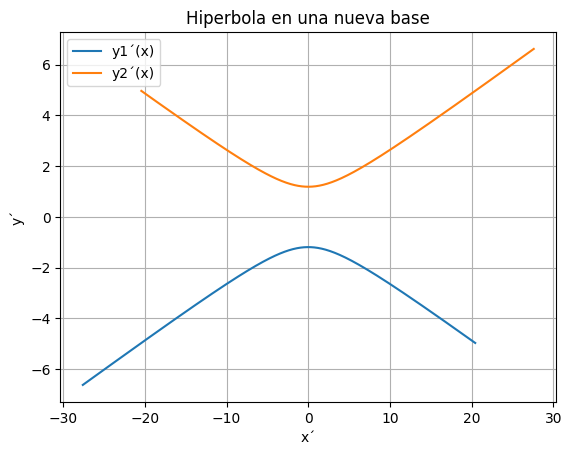

In [13]:
# Calculemos u1 y u2, para y1 y y2
v1 = np.array([x, y1(x)])
v2 = np.array([x, y2(x)])
u1 = Q.T @ v1
u2 = Q.T @ v2

# Definimos los valores de x, y1 y y2 en la nueva base
xprima1 = u1[0,].A1 # Usamos .A1 para volverlos arreglos de numpy
yprima1 = u1[1,].A1

xprima2 = u2[0,].A1
yprima2 = u2[1,].A1

# Graficamos la hiperbola en la nueva base
plt.title('Hiperbola en una nueva base')
plt.plot(xprima1, yprima1, label = 'y1´(x)')
plt.plot(xprima2, yprima2, label = 'y2´(x)')
plt.xlabel('x´')
plt.ylabel('y´')
plt.legend()
plt.grid()

### Sympy

In [14]:
from sympy import Matrix, simplify

# Definir una matriz 3x3
A = Matrix([[4, 2, 0],
            [2, 4, 1],
            [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores = A.eigenvals()
autovectores = A.eigenvects()

# Simplificar autovalores y autovectores
autovalores_simplificados = {simplify(l): m for l, m in autovalores.items()}
autovectores_simplificados = [(simplify(l), m, [simplify(v) for v in vs]) for l, m, vs in autovectores]

print("Autovalores simplificados:", autovalores_simplificados)
print("Autovectores simplificados:\n", autovectores_simplificados)


Autovalores simplificados: {11/3 + 16*2**(1/3)/(3*(61 + 3*sqrt(1407)*I)**(1/3)) + 2**(2/3)*(61 + 3*sqrt(1407)*I)**(1/3)/6: 1, (-128*2**(1/3) + (1 - sqrt(3)*I)*(44 + 2**(2/3)*(-1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 - sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1, (-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1}
Autovectores simplificados:
 [((-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)), 1, [Matrix([
[(12*(-176 + 7*2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(1 + sqrt(3)*I)**2*(61 + 3*sqrt(1407)*I) + (61 + 3*sqrt(1407)*I)**(1/3)*(128*2**(1/3) + (-44 + 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))**2 + 10752*2**(1/3)*(1 + sqrt(3)

In [15]:
autovalores_simplificados

{11/3 + 16*2**(1/3)/(3*(61 + 3*sqrt(1407)*I)**(1/3)) + 2**(2/3)*(61 + 3*sqrt(1407)*I)**(1/3)/6: 1,
 (-128*2**(1/3) + (1 - sqrt(3)*I)*(44 + 2**(2/3)*(-1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 - sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1,
 (-128*2**(1/3) + (1 + sqrt(3)*I)*(44 - 2**(2/3)*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3))*(61 + 3*sqrt(1407)*I)**(1/3))/(12*(1 + sqrt(3)*I)*(61 + 3*sqrt(1407)*I)**(1/3)): 1}

# Pytorch

Definción de una matrix de tres formas:
Hasta ahora sabemos definir matrices como objetos de numpy y objetos de sympy, en la actualidad, el rápido crecimiento de las unidades de procesamiento gráfico GPU,  permite definir otro tipo de objetos que pueden acelerar el computo computacional.


- Como objeto de numpy
- Como objeto de sympy
- Como objeto de pytorch


La velocidad de ejecución entre PyTorch y Numpy puede variar dependiendo del tamaño de los datos y si se está utilizando o no la aceleración por GPU. Para operaciones con matrices pequeñas y cálculos que no requieren de la paralelización de una GPU, Numpy puede ser más rápido porque opera directamente en la CPU y la memoria principal. Sin embargo, para matrices grandes y operaciones que pueden ser paralelizadas, PyTorch con soporte de GPU puede ser significativamente más rápido.

Comparativa de comandos de ejecución entre pytorch, numpy  y sympy


| Operación | PyTorch | Numpy | SymPy |
|-----------|---------|-------|-------|
| Creación de una matriz | `torch.tensor([[1, 2], [3, 4]])` | `np.array([[1, 2], [3, 4]])` | `Matrix([[1, 2], [3, 4]])` |
| Transposición de una matriz | `torch.transpose(A, 0, 1)` | `A.T` o `np.transpose(A)` | `A.T` |
| Multiplicación de matrices | `torch.matmul(A, B)` | `np.dot(A, B)` o `A @ B` | `A * B` |
| Inversa de una matriz | `torch.inverse(A)` | `np.linalg.inv(A)` | `A**-1` |
| Determinante de una matriz | `torch.det(A)` | `np.linalg.det(A)` | `A.det()` |
| Autovalores y autovectores | `torch.eig(A, eigenvectors=True)` | `np.linalg.eig(A)` | `A.eigenvals()`, `A.eigenvects()` |



Ejemplo básico del comparativo de un problema de algebra lineal, rotación de un vector:

In [16]:

def matrixA(theta, tipo="numpy"):
  if(tipo=="np"):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
  elif(tipo=="sp"):
    return np.array([[sp.cos(theta),-sp.sin(theta)],[sp.sin(theta), sp.cos(theta)]])

  elif(tipo=="pt"):
    return pt.tensor([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

  else:

    print("Define el tipo de variable que desea")


In [17]:
x = sp.Symbol("x")
M = sp.Matrix(matrixA(np.pi/4, tipo="sp"))
M

Matrix([
[0.707106781186548, -0.707106781186547],
[0.707106781186547,  0.707106781186548]])

In [18]:
x=np.pi/4
M = matrixA(x, tipo="np")
M

array([[ 0.707107, -0.707107],
       [ 0.707107,  0.707107]])

In [19]:
matrixA(x, tipo="pt")
M

array([[ 0.707107, -0.707107],
       [ 0.707107,  0.707107]])

Actividad: Resolver el problema de la potencia de una matriz empleando pytorch, construir.

In [20]:
# Definimos la funcion para elevar una matriz A a una potencia n empleando pytorch
def pot_matriz_Torch(A, n):
  # Si la matriz ingresada no esta definida con Torch la redefinimos
  A = pt.tensor(A, dtype = float)

  # Calculemos los autovalores y autovectores de A
  autovalores, autovectores = pt.linalg.eig(A)
  # Definimos la matriz de cambio de base con los autovectores de A como sus columnas
  U = autovectores.real.clone()

  # Calculamos la matriz diagonal D
  D = pt.matmul(pt.matmul(pt.inverse(U), A), U)

  # Calculamos A^n
  An = pt.matmul(pt.matmul(U, D**n), pt.inverse(U))

  np.set_printoptions(suppress=True, precision=6)
  return An

# Probemos nuestra funcion
A = np.matrix([[2, -1, 1],
               [0, 3, -1],
               [2, 1, 3]])

# Calculamos A^6 con la funcion y multiplicando A 6 veces
A6c = pot_matriz_Torch(A, 6)
A6e = A @ A @ A @ A @ A @ A

# Vemos la comparacion de los resultados
print('La matriz A elevada a la 6 usando la funcion da como resultado')
print(A6c)
print('El valor esperado de la matriz A elevada a la 6 da como resultado')
print(A6e)

La matriz A elevada a la 6 usando la funcion da como resultado
tensor([[ 2123.6686,    43.6687,  2015.9999],
        [-2059.6686,    20.3313, -2015.9999],
        [ 1972.3312,   -43.6687,  2079.9999]], dtype=torch.float64)
El valor esperado de la matriz A elevada a la 6 da como resultado
[[ 1888  -192  2016]
 [-1824   256 -2016]
 [ 2208   192  2080]]


Profe dan diferentes pero no entiendo por qué y no veo algún error en el código.